## Reading data

In [228]:
import pandas as pd

df = pd.read_csv("data.csv")

df.drop(columns=["switching_carries", "Do you think", "Timestamp"], inplace=True)

df.head()

,email,has_5g_phone,phone_model,carrier,5g_acads,5g_labs,5g_hostel,5g_got_better,switching_acads,switching_labs,switching_hostel,hostel,satisfaction,download_speed
0,ec21b1057@iiitdm.ac.in,Yes,Google Pixel 7,Airtel,Yes,Yes,No,No,Never,Sometimes,Always,Ashwatha,3,100 - 250
1,ec21b1012@iiitdm.ac.in,Yes,IQOO Z6 Lite,Jio,No,Yes,No,Yes,Sometimes,Sometimes,Sometimes,Ashwatha,4,Below 100
2,ec21b1031@iiitdm.ac.in,Yes,Oneplus 9 pro,Jio,Yes,Yes,No,No,Always,Sometimes,Sometimes,Ashwatha,3,Below 100
3,ec21b1025@iiitdm.ac.in,Yes,ONEPLUS 11R,Jio,Yes,No,Yes,No,Sometimes,Sometimes,Always,Ashwatha,4,Below 100
4,cs22b2008@iiitdm.ac.in,No,Redmi Note 8 pro,Airtel,No,No,No,No,Always,Always,Always,Ashoka,3,Below 100


## Transforming data

- transforming Yes/No answers to 1/0
- transforming Always/Sometimes/Never answers to 1/0.5/0
- transforming Jio/Airtel/VI/BSNL/Others to 1/2/3/4/5

In [229]:
df["has_5g_phone"] = df["has_5g_phone"].map({"Yes": 1, "No": 0})
df["5g_acads"] = df["5g_acads"].map({"Yes": 1, "No": 0})
df["5g_labs"] = df["5g_labs"].map({"Yes": 1, "No": 0})
df["5g_hostel"] = df["5g_hostel"].map({"Yes": 1, "No": 0})
df["5g_got_better"] = df["5g_got_better"].map({"Yes": 1, "No": 0})
df["switching_acads"] = df["switching_acads"].map({"Sometimes": 0.5, "Never": 0, "Always": 1})
df["switching_labs"] = df["switching_labs"].map({"Sometimes": 0.5, "Never": 0, "Always": 1})
df["switching_hostel"] = df["switching_hostel"].map({"Sometimes": 0.5, "Never": 0, "Always": 1})

## Cleaning Data

In [230]:
df.drop(columns="email", inplace=True)

In [231]:
df = df[df['has_5g_phone'] == 1]

## Data after cleaning

In [232]:
df.describe()

,has_5g_phone,5g_acads,5g_labs,5g_hostel,5g_got_better,switching_acads,switching_labs,switching_hostel,satisfaction
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,0.521739,0.565217,0.507246,0.507246,0.536232,0.514493,0.608696,3.000000
std,0.0,0.503187,0.499360,0.503610,0.503610,0.386527,0.342686,0.391730,1.028992
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,3.000000
50%,1.0,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,3.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,4.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## Computing new features

- satisfaction_acads - combining 5g_acads and switching_acads
- satisfaction_acads = 5g_acads - switching_acads
- similarly for labs and hostel

In [233]:
df['satisfaction_acads'] = df["5g_acads"] - df["switching_acads"]
df['satisfaction_labs'] = df['5g_labs'] - df["switching_labs"]
df['satisfaction_hostel'] = df['5g_hostel'] - df["switching_hostel"]

## Data visualization

array([[<Axes: title={'center': 'has_5g_phone'}>,
        <Axes: title={'center': '5g_acads'}>,
        <Axes: title={'center': '5g_labs'}>],
       [<Axes: title={'center': '5g_hostel'}>,
        <Axes: title={'center': '5g_got_better'}>,
        <Axes: title={'center': 'switching_acads'}>],
       [<Axes: title={'center': 'switching_labs'}>,
        <Axes: title={'center': 'switching_hostel'}>,
        <Axes: title={'center': 'satisfaction'}>],
       [<Axes: title={'center': 'satisfaction_acads'}>,
        <Axes: title={'center': 'satisfaction_labs'}>,
        <Axes: title={'center': 'satisfaction_hostel'}>]], dtype=object)

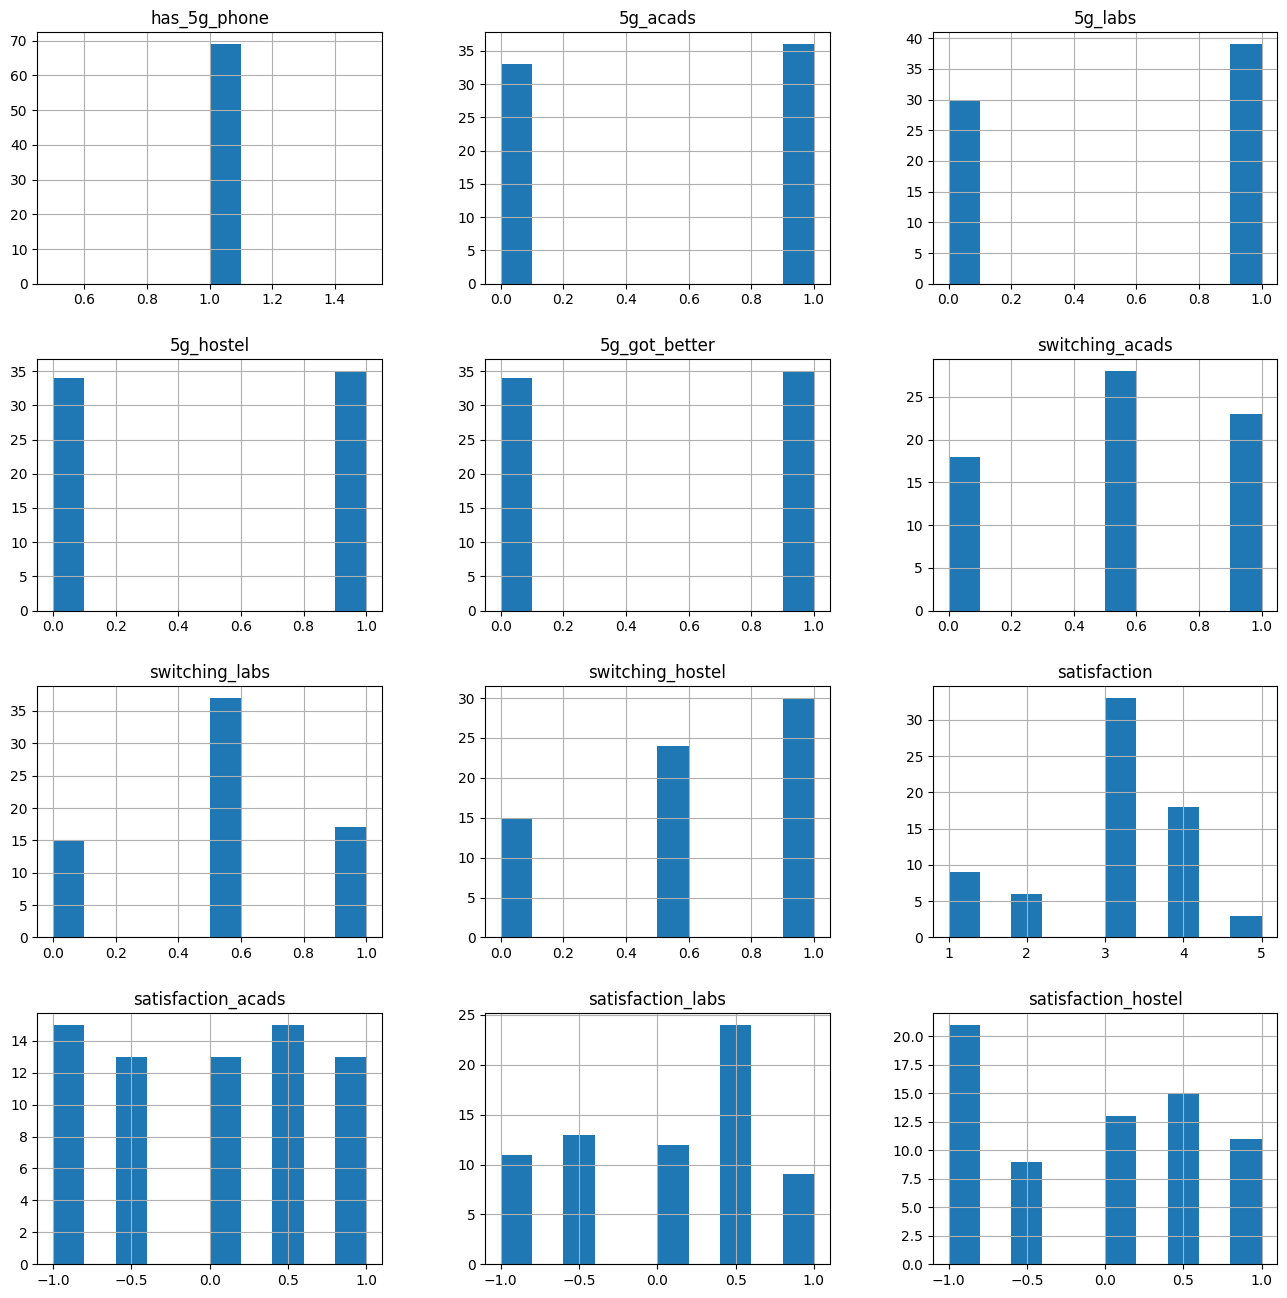

In [234]:
df.hist(figsize=(16,16))

In [235]:
df.carrier.describe()

count      69
unique      3
top       Jio
freq       40
Name: carrier, dtype: object

## Which area gets the best 5g service among acads/labs/hostel ?

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fs = plt.figure(figsize=(15,5))
gs = GridSpec(1,3)

<Figure size 1500x500 with 0 Axes>

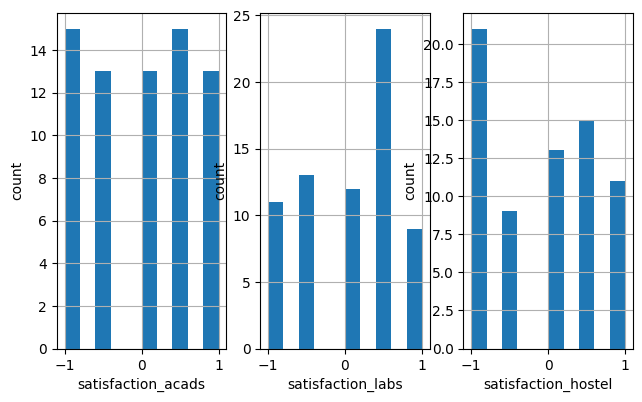

In [237]:
ax1 = plt.subplot(gs[0, 0])
plt.xlabel("satisfaction_acads")
plt.ylabel("count")
df["satisfaction_acads"].hist()

ax3 = plt.subplot(gs[0, 1])
plt.xlabel("satisfaction_labs")
plt.ylabel("count")
df["satisfaction_labs"].hist()

ax2 = plt.subplot(gs[0, 2])
plt.xlabel("satisfaction_hostel")
plt.ylabel("count")
df["satisfaction_hostel"].hist()
plt.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.9)

- Looking at these histograms one can easily conclude that the satisfaction rates are highest in academics block, followed by laboratory complex and hostels.
- When we compare academics block and laboratory complex, acads has **13** 1 scores (1 is awarded when a person says they get 5g and they never switch to 4g since the 5g signal is weak) and **15** 0.5 scores (0.5 is awarded when a person says they get 5g and they switch to 4g sometimes) which is better than lab's **9** one and **24** 0.5 scores 

## Which Hostel gets best 5g service ?

<Axes: xlabel='5g_hostel', ylabel='hostel'>

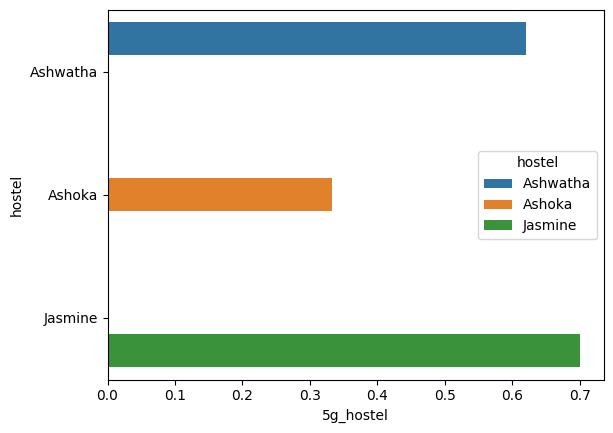

In [238]:
sns.barplot(x="5g_hostel", y="hostel", hue="hostel", data=df, errorbar=None)

<Axes: xlabel='satisfaction_hostel', ylabel='hostel'>

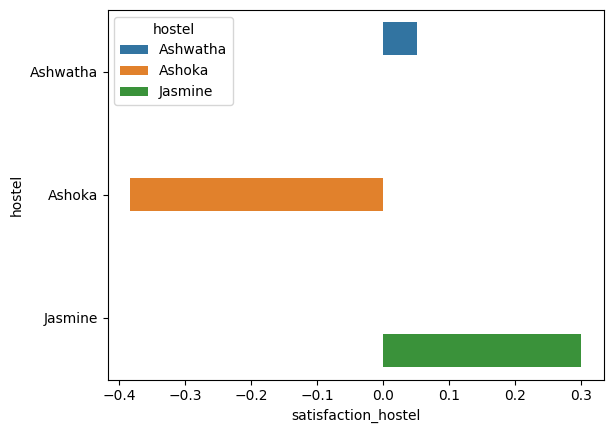

In [239]:
sns.barplot(x="satisfaction_hostel", y="hostel", hue="hostel", data=df, errorbar=None)

### Conclusion
- When we only consider the question `do yo get 5g in your hostel ?` Jasmine is the best, followed by Ashwatha and Ashoka.
- When you factor in the question `do you switch to 4g since the 5g signal is low ?` the same trend continues but we can see a serious dip in *satisfaction level* for Ashoka. 
- Jasmine stays on the top and with a positive score, implies many people said the *do* get 5g and they *don't* have to switch to 4g.

## Which Carrier is the best for you ?
- We only have 3 data points for VI, so we cannot conclude anything about VI
- To answer this question let's look at the satisfaction level across areas for different carriers


<Axes: xlabel='carrier', ylabel='Count'>

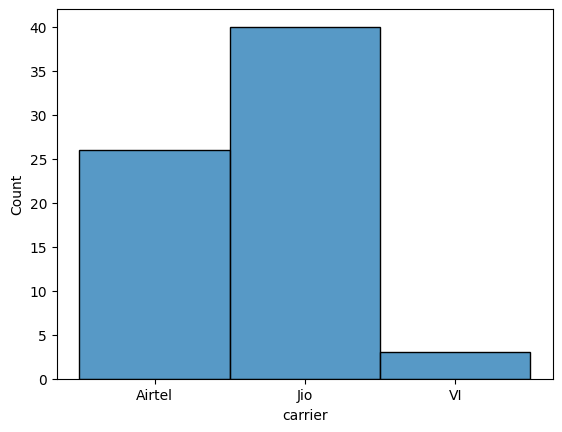

In [240]:
sns.histplot(data=df["carrier"])

### Academics

<Axes: xlabel='satisfaction_acads', ylabel='carrier'>

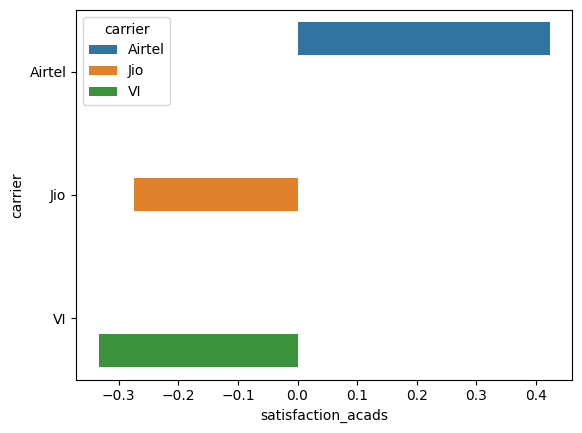

In [241]:
sns.barplot(x="satisfaction_acads", y="carrier", hue="carrier", data=df, errorbar=None)

### Laboratory Block

<Axes: xlabel='satisfaction_labs', ylabel='carrier'>

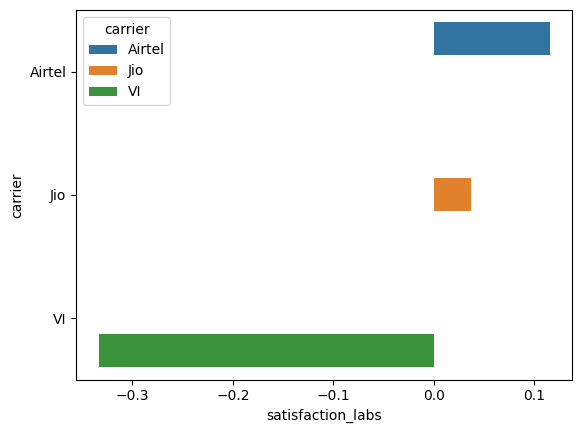

In [242]:
sns.barplot(x="satisfaction_labs", y="carrier", hue="carrier", data=df, errorbar=None)

### Hostels

<Axes: xlabel='satisfaction_hostel', ylabel='carrier'>

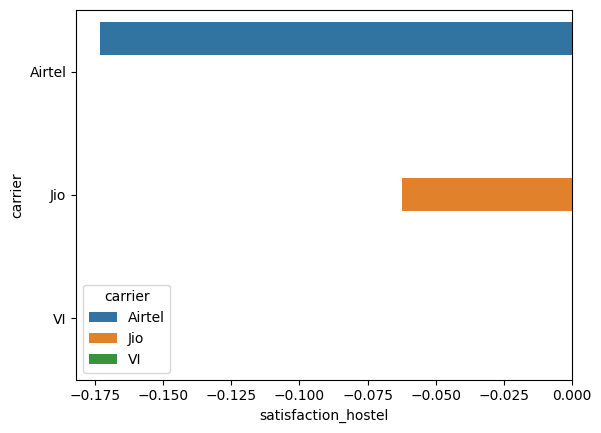

In [243]:
sns.barplot(x="satisfaction_hostel", y="carrier", hue="carrier", data=df, errorbar=None)

- By looking at these bar graphs we can conclude that **Airtel** has overall better satisfaction rates compared with **Jio**. Although Jio has slightly better satisfaction rates when it comes to hostels, they lack behind Airtel by a huge margin in acads
- Now let's compare the satisfaction rates collected in the google form

<Axes: xlabel='satisfaction', ylabel='carrier'>

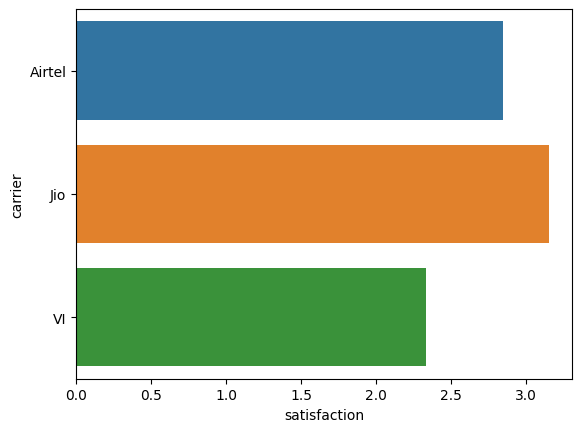

In [244]:
sns.barplot(x="satisfaction", y="carrier", data=df, errorbar=None)

- One would think that **Airtel** will top this list as well. Surprisingly **Jio** has better perceived satisfaction rates.
- To understand the reason behind this let's look at the question `do you think 5g service got better compared to earlier this year ?`

22 13


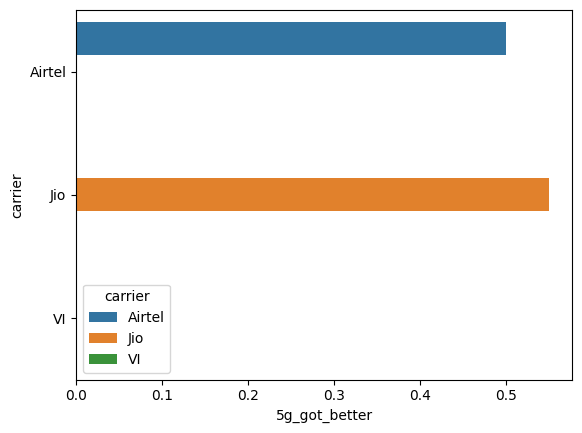

In [245]:
sns.barplot(x="5g_got_better", y="carrier", data=df, hue="carrier", errorbar=None)
jio = df[(df["carrier"] == "Jio") & (df["5g_got_better"] == 1)]
airtel = df[(df["carrier"] == "Airtel") & (df["5g_got_better"] == 1)]
print(len(jio), len(airtel))

We can see that **23** Jio users said that 5g got better which is **13** more than that of Airtel

In [246]:
df

,has_5g_phone,phone_model,carrier,5g_acads,5g_labs,5g_hostel,5g_got_better,switching_acads,switching_labs,switching_hostel,hostel,satisfaction,download_speed,satisfaction_acads,satisfaction_labs,satisfaction_hostel
0,1,Google Pixel 7,Airtel,1,1,0,0,0.0,0.5,1.0,Ashwatha,3,100 - 250,1.0,0.5,-1.0
1,1,IQOO Z6 Lite,Jio,0,1,0,1,0.5,0.5,0.5,Ashwatha,4,Below 100,-0.5,0.5,-0.5
2,1,Oneplus 9 pro,Jio,1,1,0,0,1.0,0.5,0.5,Ashwatha,3,Below 100,0.0,0.5,-0.5
3,1,ONEPLUS 11R,Jio,1,0,1,0,0.5,0.5,1.0,Ashwatha,4,Below 100,0.5,-0.5,0.0
5,1,OnePlus Nord 2T 5G,Jio,0,0,1,0,0.0,0.0,0.0,Ashoka,3,100 - 250,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,NaN,Airtel,0,0,1,1,1.0,0.5,0.0,Ashwatha,3,Below 100,-1.0,-0.5,1.0
76,1,Vivo Y72 5G,Jio,0,0,0,1,1.0,1.0,1.0,Ashwatha,4,Below 100,-1.0,-1.0,-1.0
77,1,Samsung Galaxy A73 5G,Airtel,1,1,1,1,0.5,0.5,0.0,Ashwatha,4,Below 100,0.5,0.5,1.0
78,1,Realme gt neo 2,Jio,1,1,1,0,1.0,1.0,1.0,Ashwatha,3,100 - 250,0.0,0.0,0.0


## Modelling

In [247]:
# making carriers into numbers
df.dropna(inplace=True)
df["carrier"] = df["carrier"].map({"Jio": 1, "Airtel": 2, "VI": 3})

df["download_speed"] = df["download_speed"].map(
    {"Below 100": 0, "100 - 250": 1, "250 - 500": 2, "Above 500": 3}
)

In [260]:
X = df.filter(
    [
        "satisfaction_acads",
        "satisfaction_labs",
        "satisfaction_hostel",
        "satisfaction",
        "5g_got_better",
    ]
)
y = df["download_speed"]


X.dropna(inplace=True)
y.dropna(inplace=True)

In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [254]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=4)

In [257]:
neigh.fit(X, y)
y_pred = neigh.predict(X_test)
print((y_test == y_pred).sum() / len(y_test))

0.9333333333333333
